#**Binary Classification with PyCaret**

Binary classification is a supervised machine learning technique where the goal is to classify instances into one of two classes.

**Install Pycaret**

In [1]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret[full]
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 4.0 MB/s 

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
from google.colab import files
plt.rcParams['figure.figsize'] = (7,5)
import gdown

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The main aim of the data is to discriminate
healthy people from those with Parkinson's Disease (PD), according to the ”status”
column which is set to 0 for healthy and 1 for PD. A set of
7 features related to several measurements of frequency and
amplitude of voice-recording signals including Flo (Hz), Jitter (%),
Jitter (Abs), RAP, PPQ, Jitter: DDP, and MDVP: Shimmer
is used to diagnose PD in this study



All of these parameters are real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/Parkinsons

In [5]:
id = "1LlsSrhxJmuBVS60Iai56TGiGI8Fktkdw"
output = "parkinson-disease.csv"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1LlsSrhxJmuBVS60Iai56TGiGI8Fktkdw
To: /content/parkinson-disease.csv
100%|██████████| 11.4k/11.4k [00:00<00:00, 12.7MB/s]


'parkinson-disease.csv'

In [6]:
#read csv file into dataframe
df = pd.read_csv('./parkinson-disease.csv')
df.head(25)

Flo(Hz)  Jitter(%)  Jitter(Abs)      RAP      PPQ  Jitter:DDP  \
0    74.997    0.00784      0.00007  0.00370  0.00554     0.01109   
1   113.819    0.00968      0.00008  0.00465  0.00696     0.01394   
2   111.555    0.01050      0.00009  0.00544  0.00781     0.01633   
3   111.366    0.00997      0.00009  0.00502  0.00698     0.01505   
4   110.655    0.01284      0.00011  0.00655  0.00908     0.01966   
5   113.787    0.00968      0.00008  0.00463  0.00750     0.01388   
6   114.820    0.00333      0.00003  0.00155  0.00202     0.00466   
7   104.315    0.00290      0.00003  0.00144  0.00182     0.00431   
8    91.754    0.00551      0.00006  0.00293  0.00332     0.00880   
9    91.226    0.00532      0.00006  0.00268  0.00332     0.00803   
10   84.072    0.00505      0.00006  0.00254  0.00330     0.00763   
11   86.292    0.00540      0.00006  0.00281  0.00336     0.00844   
12  131.276    0.00293      0.00002  0.00118  0.00153     0.00355   
13   76.556    0.00390      0.00003  0.00165  0.00208     0.00496   
14   75.836    0.00294      0.00002  0.00121  0.00149     0.00364   
15   83.159    0.00369      0.00003  0.00157  0.00203     0.00471   
16   82.764    0.00544      0.00004  0.00211  0.00292     0.00632   
17   75.603    0.00718      0.00004  0.00284  0.00387     0.00853   
18   68.623    0.00742      0.00005  0.00364  0.00432     0.01092   
19  142.822    0.00768      0.00005  0.00372  0.00399     0.01116   
20   65.782    0.00840      0.00005  0.00428  0.00450     0.01285   
21   78.128    0.00480      0.00003  0.00232  0.00267     0.00696   
22   79.068    0.00442      0.00003  0.00220  0.00247     0.00661   
23   86.180    0.00476      0.00003  0.00221  0.00258     0.00663   
24   76.779    0.00742      0.00005  0.00380  0.00390     0.01140   

    MDVP:Shimmer  status  
0        0.04374       1  
1        0.06134       1  
2        0.05233       1  
3        0.05492       1  
4        0.06425       1  
5        0.04701       1  
6        0.01608       1  
7        0.01567       1  
8        0.02093       1  
9        0.02838       1  
10       0.02143       1  
11       0.02752       1  
12       0.01259       1  
13       0.01642       1  
14       0.01828       1  
15       0.01503       1  
16       0.02047       1  
17       0.03327       1  
18       0.05517       1  
19       0.03995       1  
20       0.03810       1  
21       0.04137       1  
22       0.04351       1  
23       0.04192       1  
24       0.01659       1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Flo(Hz)       195 non-null    float64
 1   Jitter(%)     195 non-null    float64
 2   Jitter(Abs)   195 non-null    float64
 3   RAP           195 non-null    float64
 4   PPQ           195 non-null    float64
 5   Jitter:DDP    195 non-null    float64
 6   MDVP:Shimmer  195 non-null    float64
 7   status        195 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.3 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

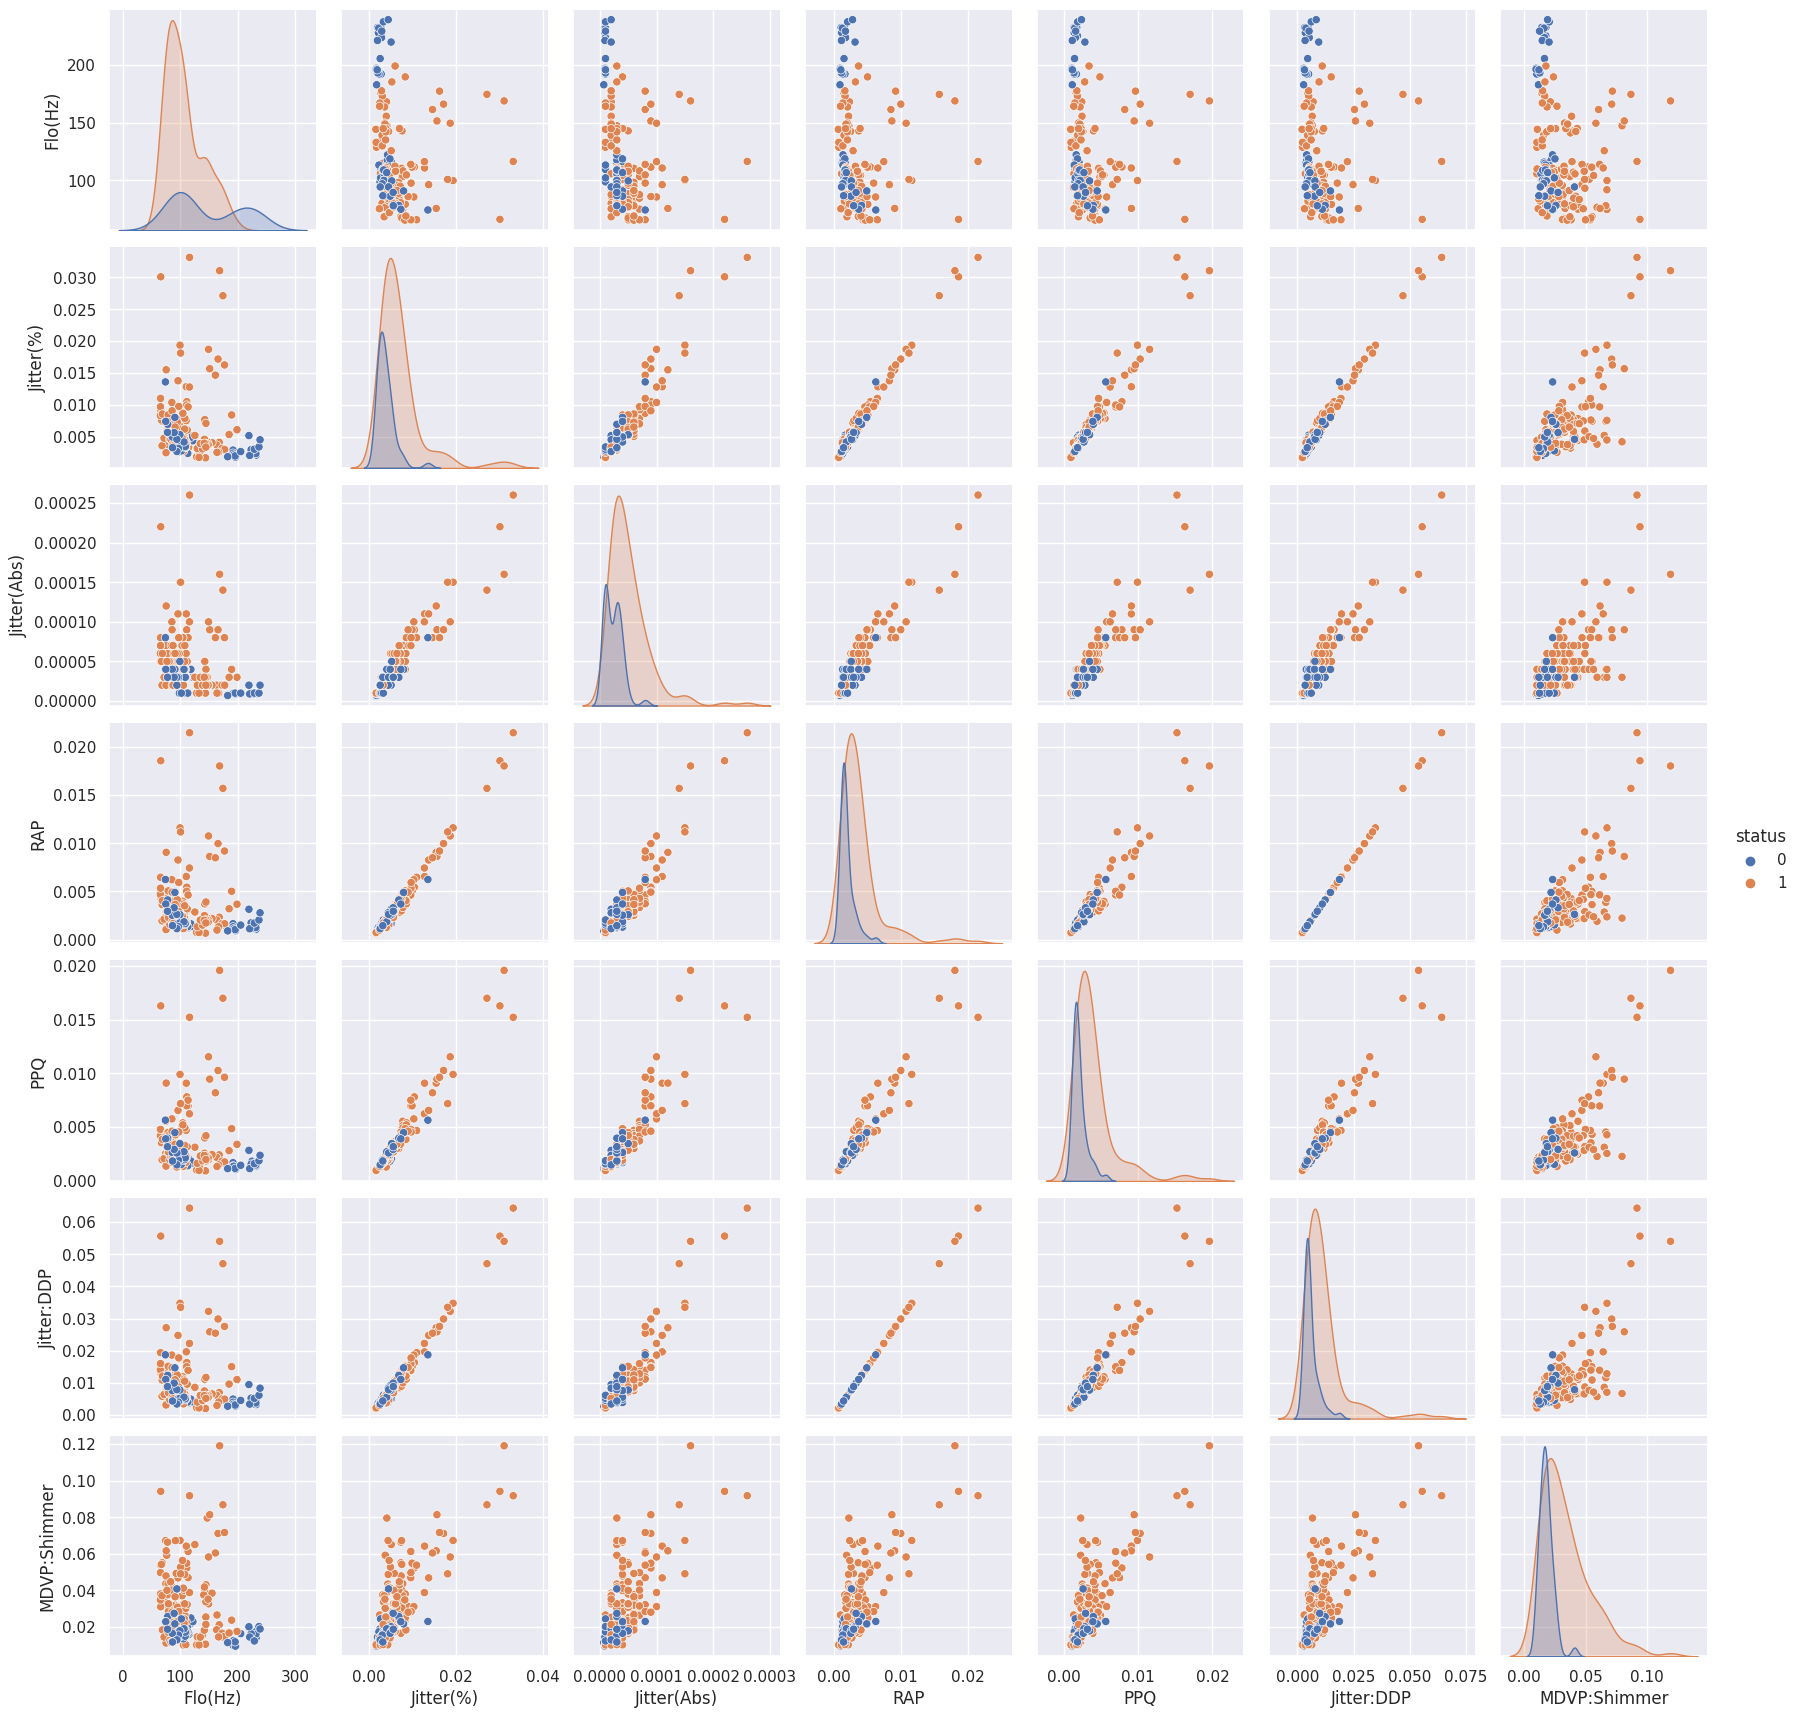

In [10]:
sns.pairplot(df,hue="status")
plt.style.use('fivethirtyeight')
plt.show()

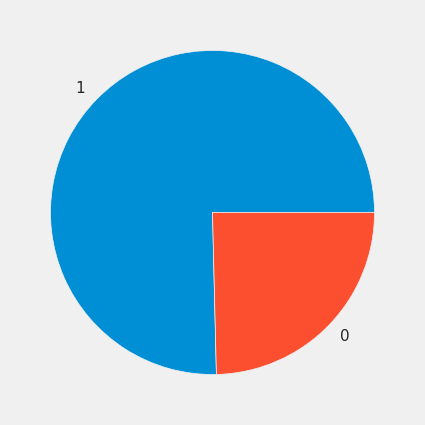

In [11]:
y=df['status']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()


**Data Matrix**

In [12]:
X = df.drop(columns=['status'])
X.head(10)

Flo(Hz)  Jitter(%)  Jitter(Abs)      RAP      PPQ  Jitter:DDP  MDVP:Shimmer
0   74.997    0.00784      0.00007  0.00370  0.00554     0.01109       0.04374
1  113.819    0.00968      0.00008  0.00465  0.00696     0.01394       0.06134
2  111.555    0.01050      0.00009  0.00544  0.00781     0.01633       0.05233
3  111.366    0.00997      0.00009  0.00502  0.00698     0.01505       0.05492
4  110.655    0.01284      0.00011  0.00655  0.00908     0.01966       0.06425
5  113.787    0.00968      0.00008  0.00463  0.00750     0.01388       0.04701
6  114.820    0.00333      0.00003  0.00155  0.00202     0.00466       0.01608
7  104.315    0.00290      0.00003  0.00144  0.00182     0.00431       0.01567
8   91.754    0.00551      0.00006  0.00293  0.00332     0.00880       0.02093
9   91.226    0.00532      0.00006  0.00268  0.00332     0.00803       0.02838

In [13]:
X.describe().transpose()

count        mean        std        min        25%        50%  \
Flo(Hz)       195.0  116.324631  43.521413  65.476000  84.291000  104.31500   
Jitter(%)     195.0    0.006220   0.004848   0.001680   0.003460    0.00494   
Jitter(Abs)   195.0    0.000044   0.000035   0.000007   0.000020    0.00003   
RAP           195.0    0.003306   0.002968   0.000680   0.001660    0.00250   
PPQ           195.0    0.003446   0.002759   0.000920   0.001860    0.00269   
Jitter:DDP    195.0    0.009920   0.008903   0.002040   0.004985    0.00749   
MDVP:Shimmer  195.0    0.029709   0.018857   0.009540   0.016505    0.02297   

                     75%        max  
Flo(Hz)       140.018500  239.17000  
Jitter(%)       0.007365    0.03316  
Jitter(Abs)     0.000060    0.00026  
RAP             0.003835    0.02144  
PPQ             0.003955    0.01958  
Jitter:DDP      0.011505    0.06433  
MDVP:Shimmer    0.037885    0.11908

**Standardize the Data**

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Flo(Hz)  Jitter(%)  Jitter(Abs)       RAP       PPQ  Jitter:DDP  \
0 -0.952037   0.334914     0.749759  0.132963  0.760800    0.131755   
1 -0.057721   0.715418     1.037674  0.453892  1.276809    0.452684   
2 -0.109875   0.884991     1.325589  0.720770  1.585687    0.721813   
3 -0.114229   0.775389     1.325589  0.578885  1.284076    0.577677   
4 -0.130608   1.368893     1.901418  1.095750  2.047187    1.096793   
5 -0.058458   0.715418     1.037674  0.447135  1.473037    0.445927   
6 -0.034661  -0.597735    -0.401899 -0.593351 -0.518319   -0.592304   
7 -0.276658  -0.686658    -0.401899 -0.630511 -0.590996   -0.631716   
8 -0.566017  -0.146921     0.461845 -0.127159 -0.045917   -0.126113   
9 -0.578181  -0.186212     0.461845 -0.211614 -0.045917   -0.212820   

   MDVP:Shimmer  
0      0.745985  
1      1.681731  
2      1.202693  
3      1.340396  
4      1.836448  
5      0.919842  
6     -0.724625  
7     -0.746424  
8     -0.466763  
9     -0.070666

In [15]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Flo(Hz)       195.0  1.047595e-16  1.002574 -1.171366 -0.737938 -0.276658   
Jitter(%)     195.0  1.821904e-17  1.002574 -0.938949 -0.570852 -0.264794   
Jitter(Abs)   195.0  9.109522e-17  1.002574 -1.064103 -0.689814 -0.401899   
RAP           195.0 -1.275333e-16  1.002574 -0.887254 -0.556191 -0.272422   
PPQ           195.0  6.376666e-17  1.002574 -0.918044 -0.576461 -0.274850   
Jitter:DDP    195.0  7.287618e-17  1.002574 -0.887333 -0.555707 -0.273628   
MDVP:Shimmer  195.0  2.368476e-16  1.002574 -1.072340 -0.702029 -0.358302   

                   75%       max  
Flo(Hz)       0.545820  2.829908  
Jitter(%)     0.236686  5.570985  
Jitter(Abs)   0.461845  6.220139  
RAP           0.178568  6.125892  
PPQ           0.184833  5.862742  
Jitter:DDP    0.178487  6.126923  
MDVP:Shimmer  0.434690  4.751617

**Observations and variables**

In [16]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

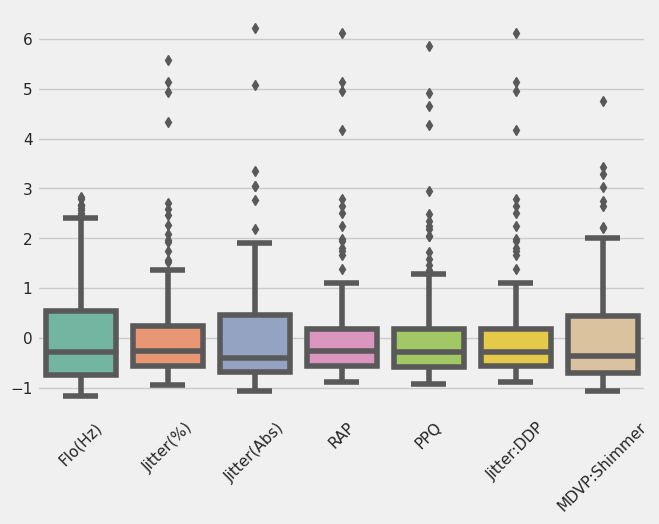

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

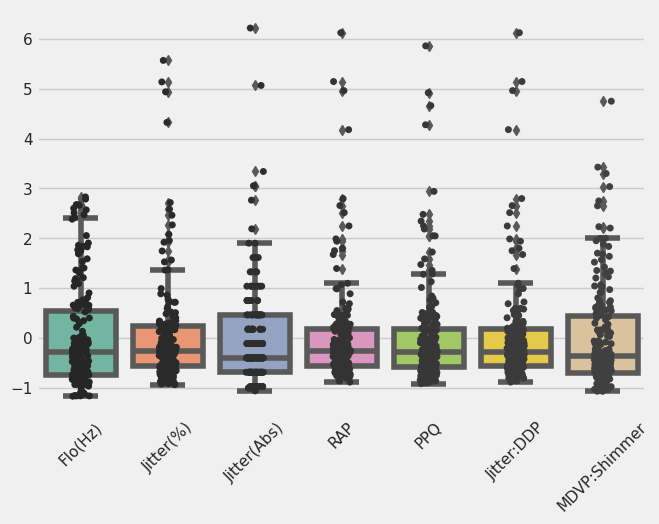

In [18]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

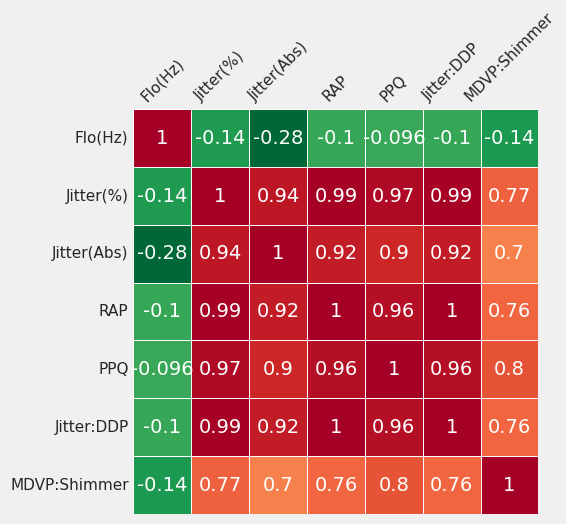

In [19]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

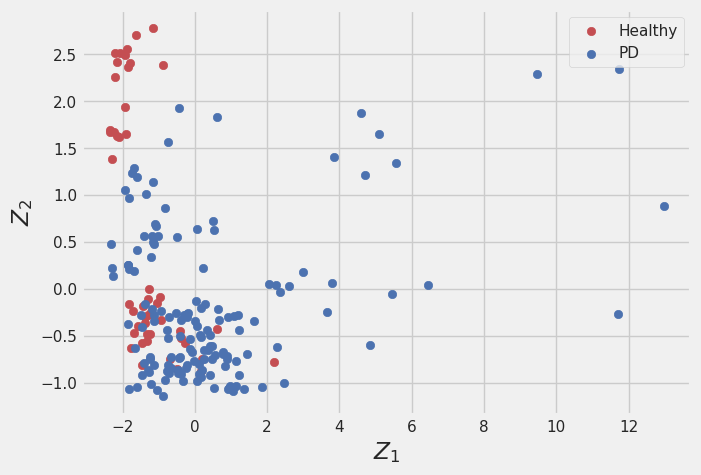

In [20]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Healthy)->0,  2(PD)->1,
idx_Healthy = np.where(y == 0)
idx_PD = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Healthy,0], Z[idx_Healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_PD,0], Z[idx_PD,1], c='b', label='PD')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

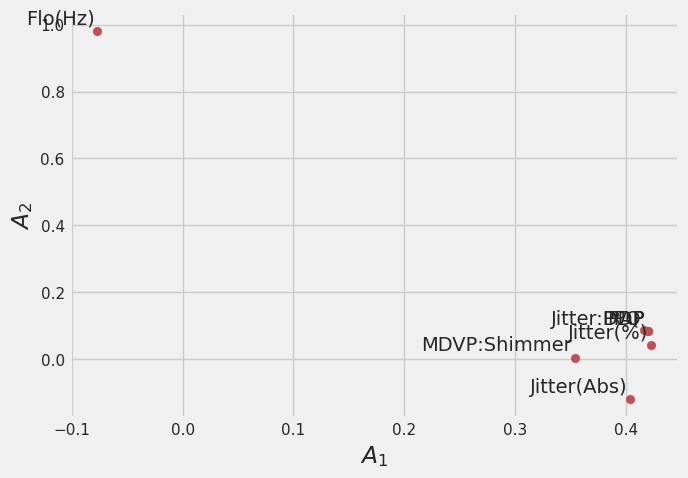

In [21]:
A = pca.components_.T
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

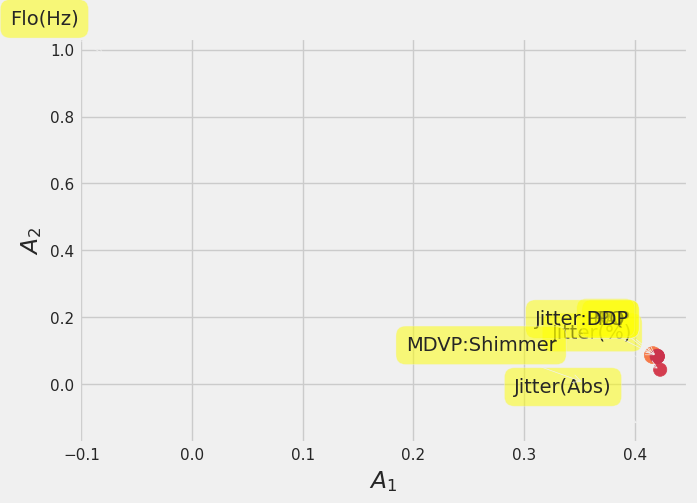

In [22]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))

plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

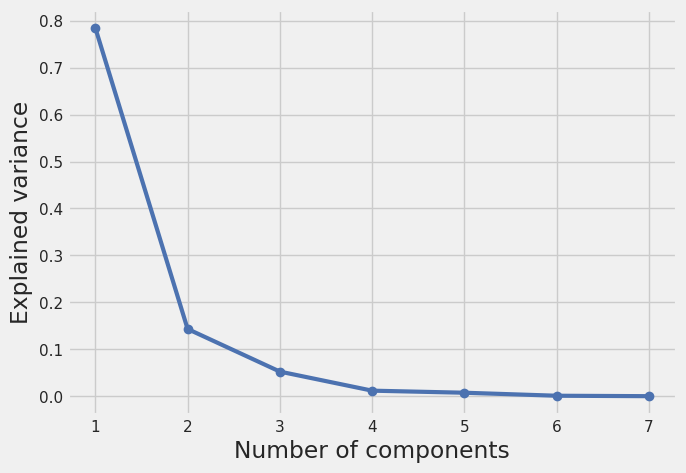

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'bo-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

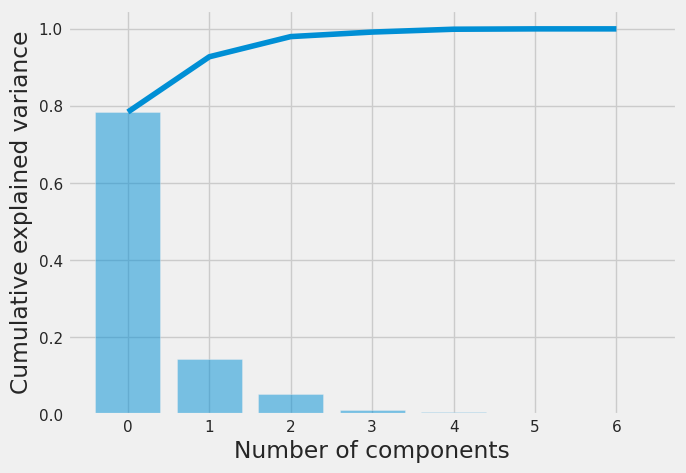

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

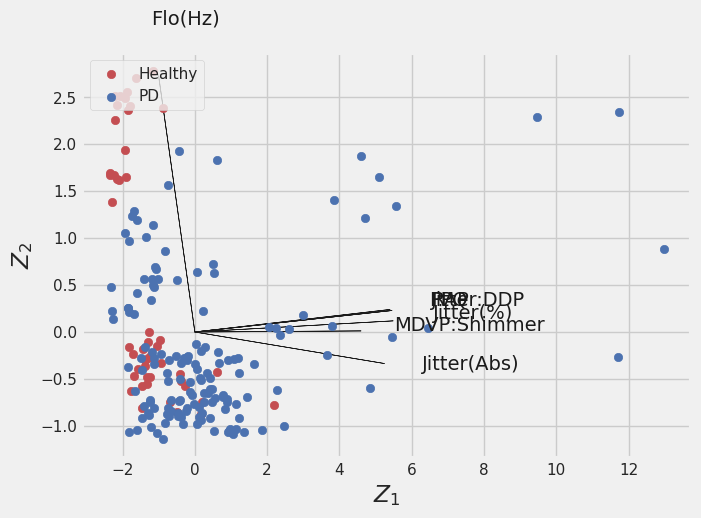

In [25]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Healthy,0], Z[idx_Healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_PD,0], Z[idx_PD,1], c='b', label='PD')
plt.legend(loc='upper left')

##**Using PCA Library**

In [26]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.7 MB/s eta 0:00:00


In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [28]:
out['PC']

PC1       PC2       PC3
0    1.210384 -0.919886  0.374321
1    2.234514  0.040189  0.978566
2    2.610717  0.030316  0.338137
3    2.367772 -0.027632  0.534368
4    3.781406  0.065245  0.553460
..        ...       ...       ...
190 -0.376667 -0.526463  0.788859
191 -0.285019 -0.579785  0.023005
192  2.179757 -0.779644 -1.191831
193  0.183517 -0.877427 -0.382651
194 -0.490057 -0.853977 -0.359854

[195 rows x 3 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.17%] of the variance'}, xlabel='PC1 (78.4% expl.var)', ylabel='PC2 (14.3% expl.var)'>)

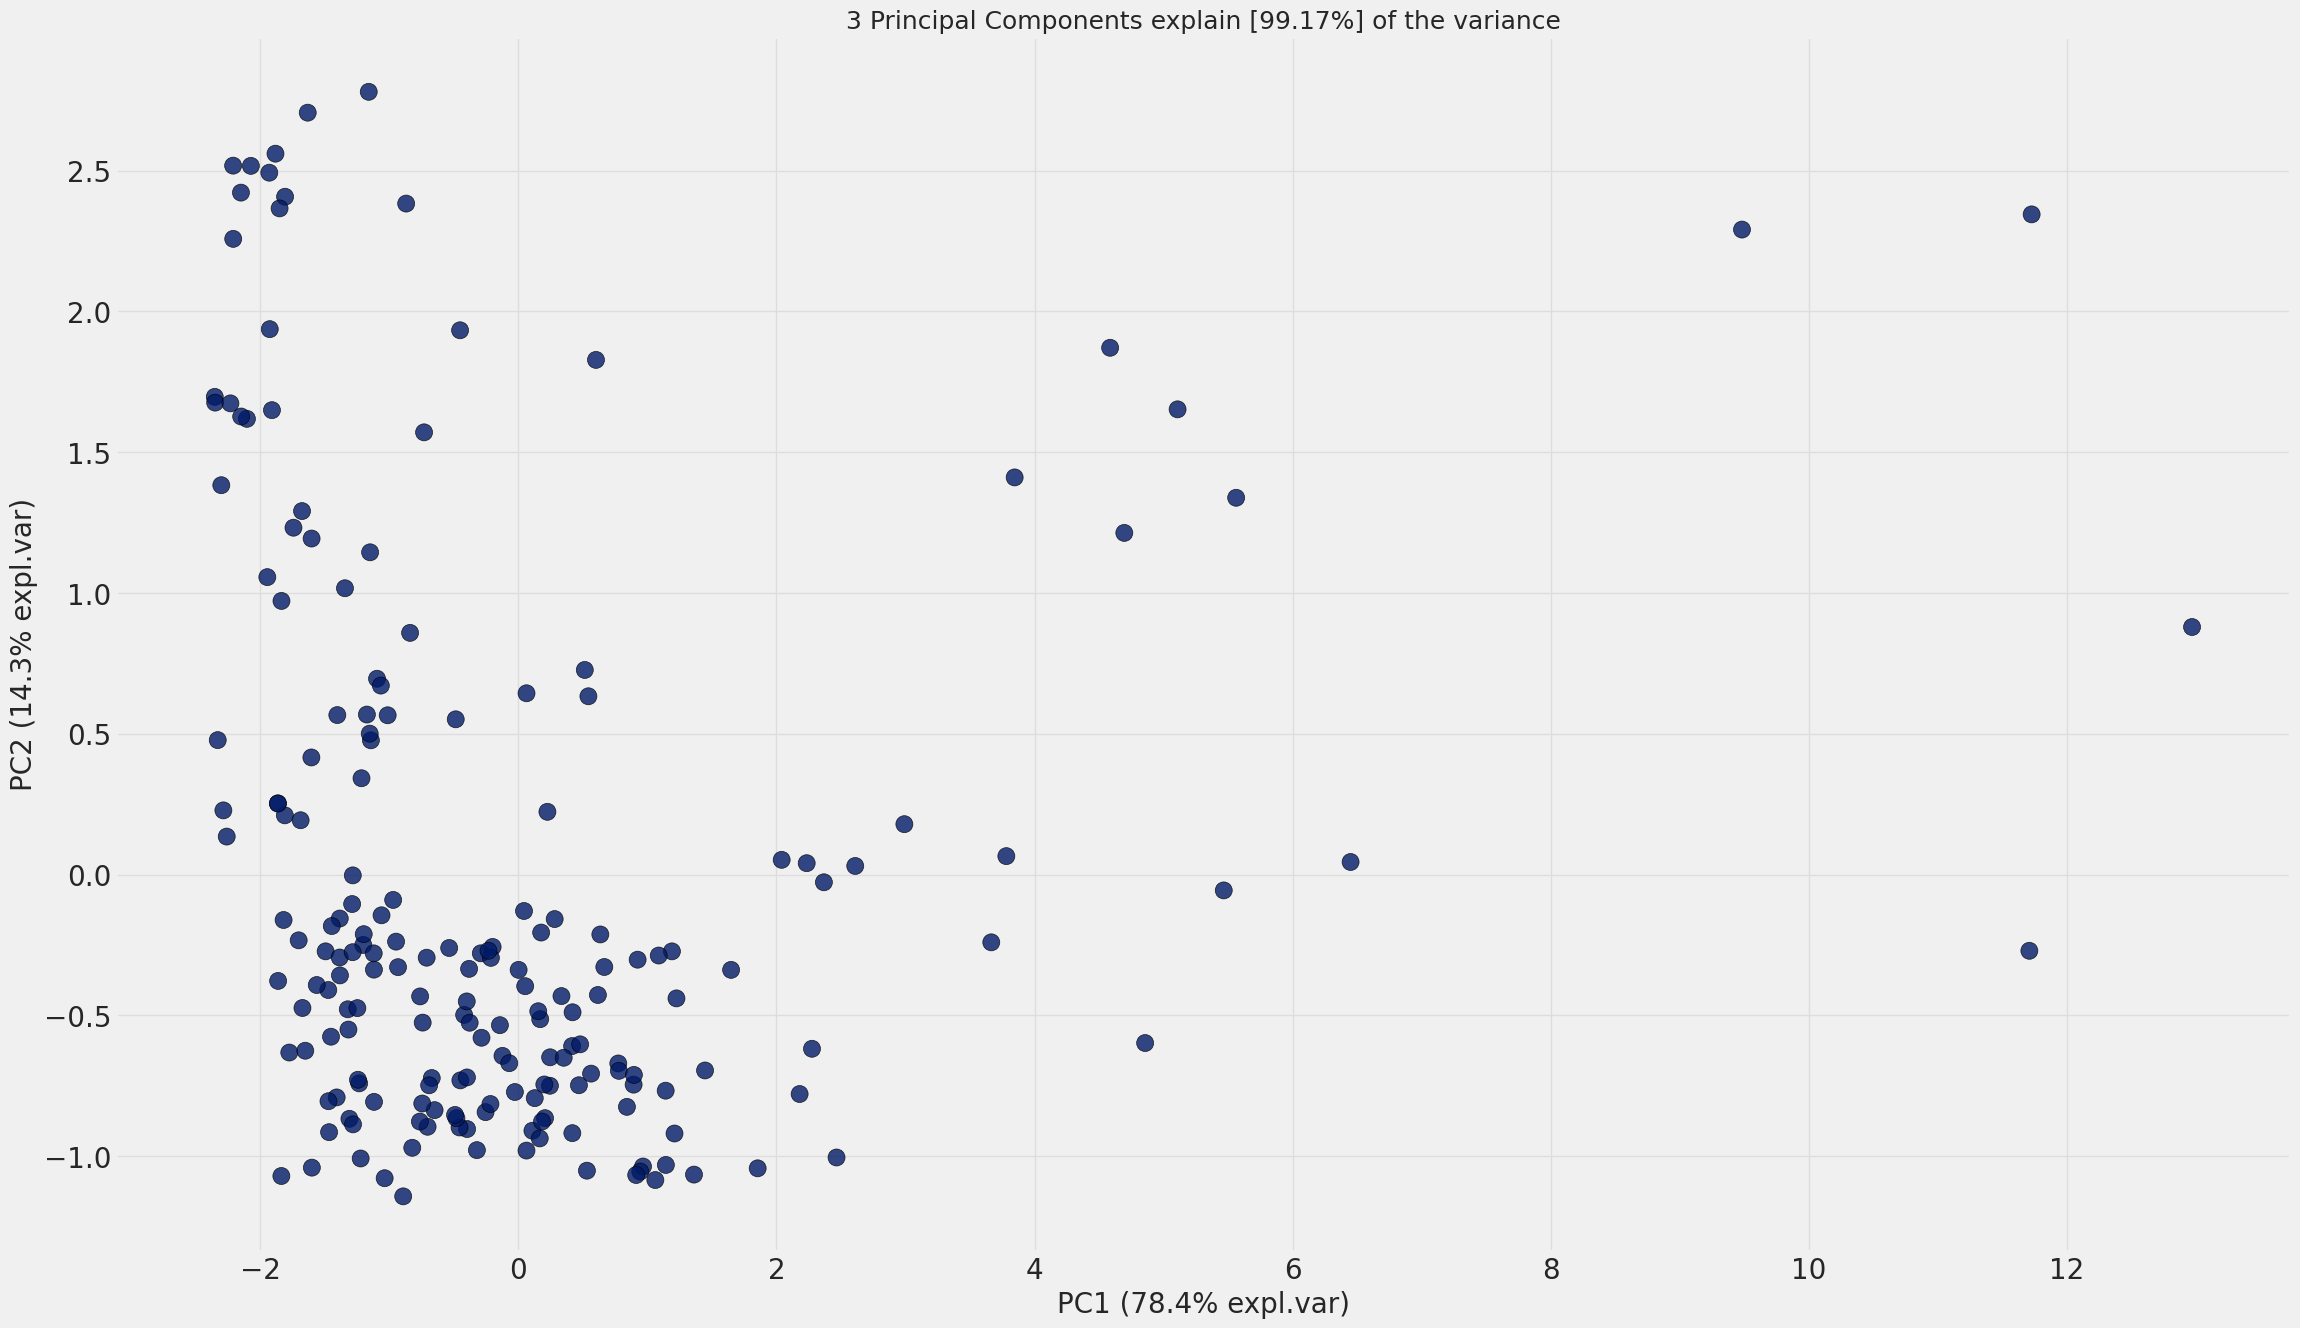

In [29]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [30]:
A = out['loadings'].T

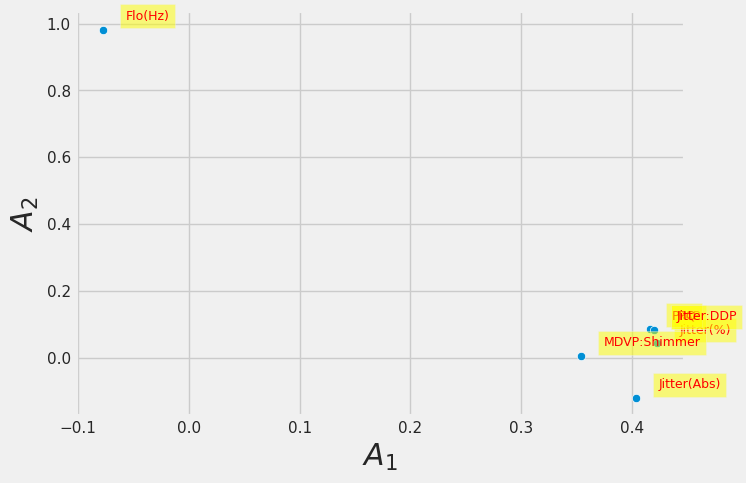

In [31]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.03, s=variables[i],
          fontdict=dict(color='red',size=9),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

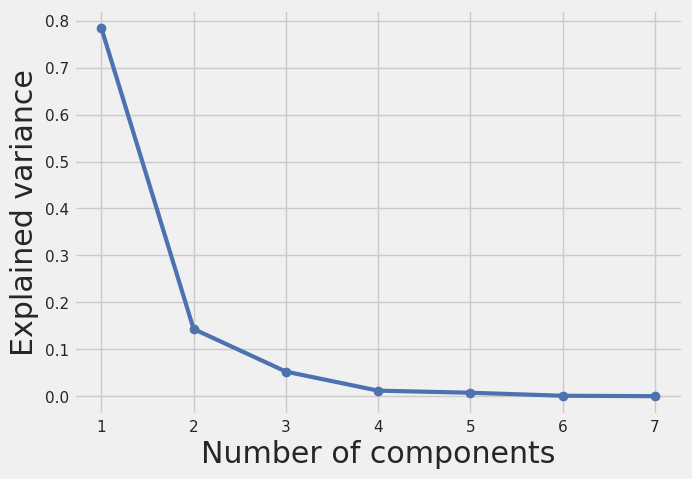

In [32]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'bo-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

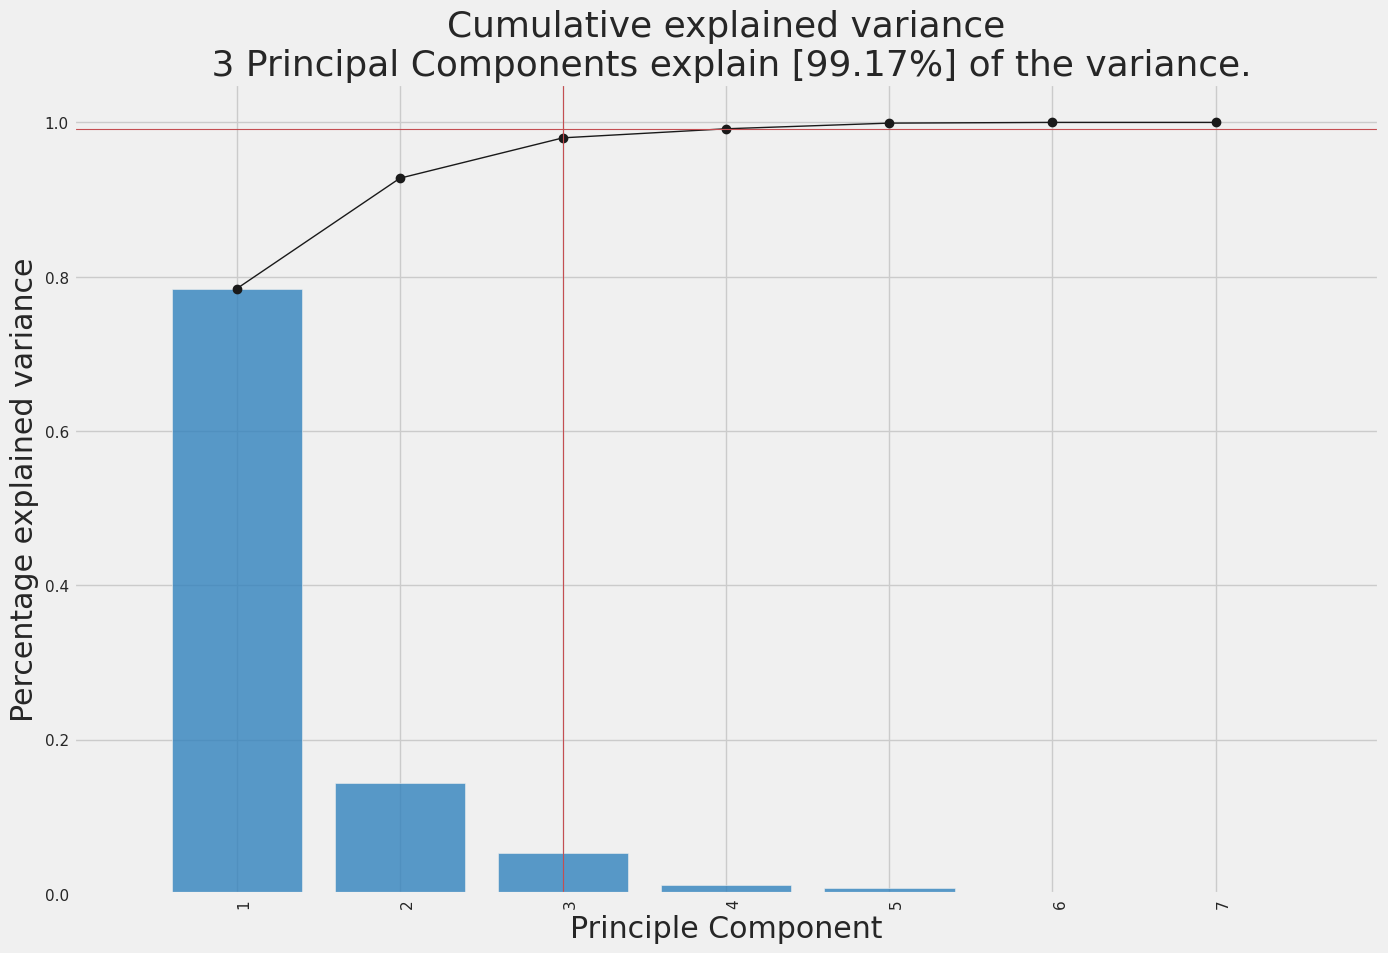

In [33]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.17%] of the variance'}, xlabel='PC1 (78.4% expl.var)', ylabel='PC2 (14.3% expl.var)'>)

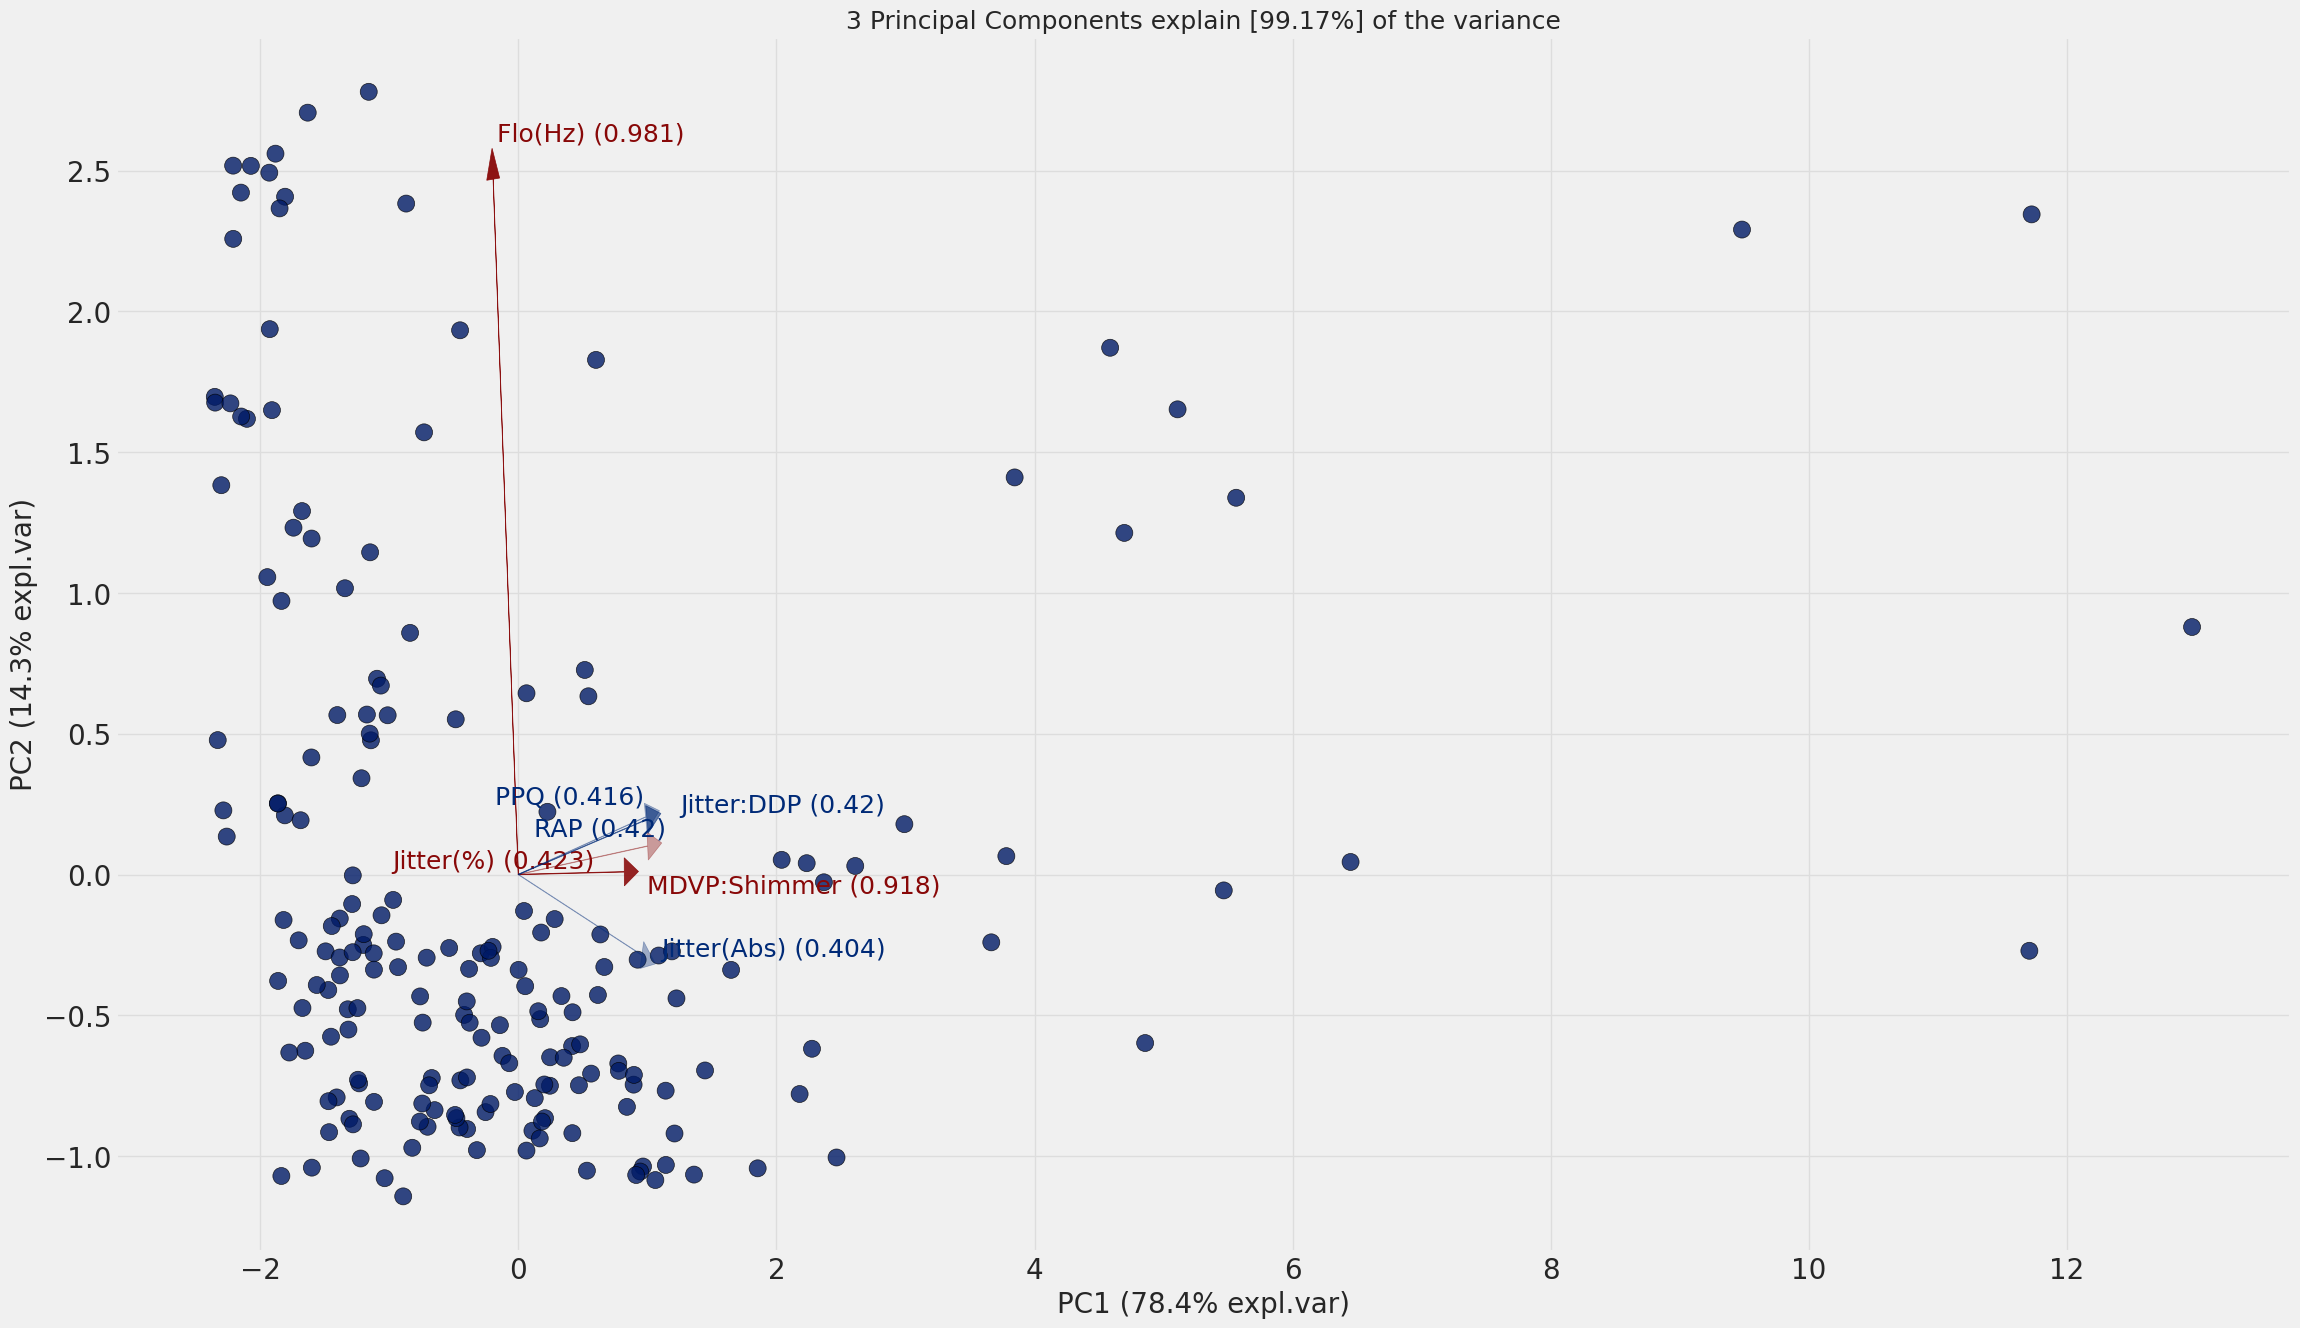

In [34]:
model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [99.17%] of the variance'}, xlabel='PC1 (78.4% expl.var)', ylabel='PC2 (14.3% expl.var)', zlabel='PC3 (5.23% expl.var)'>)

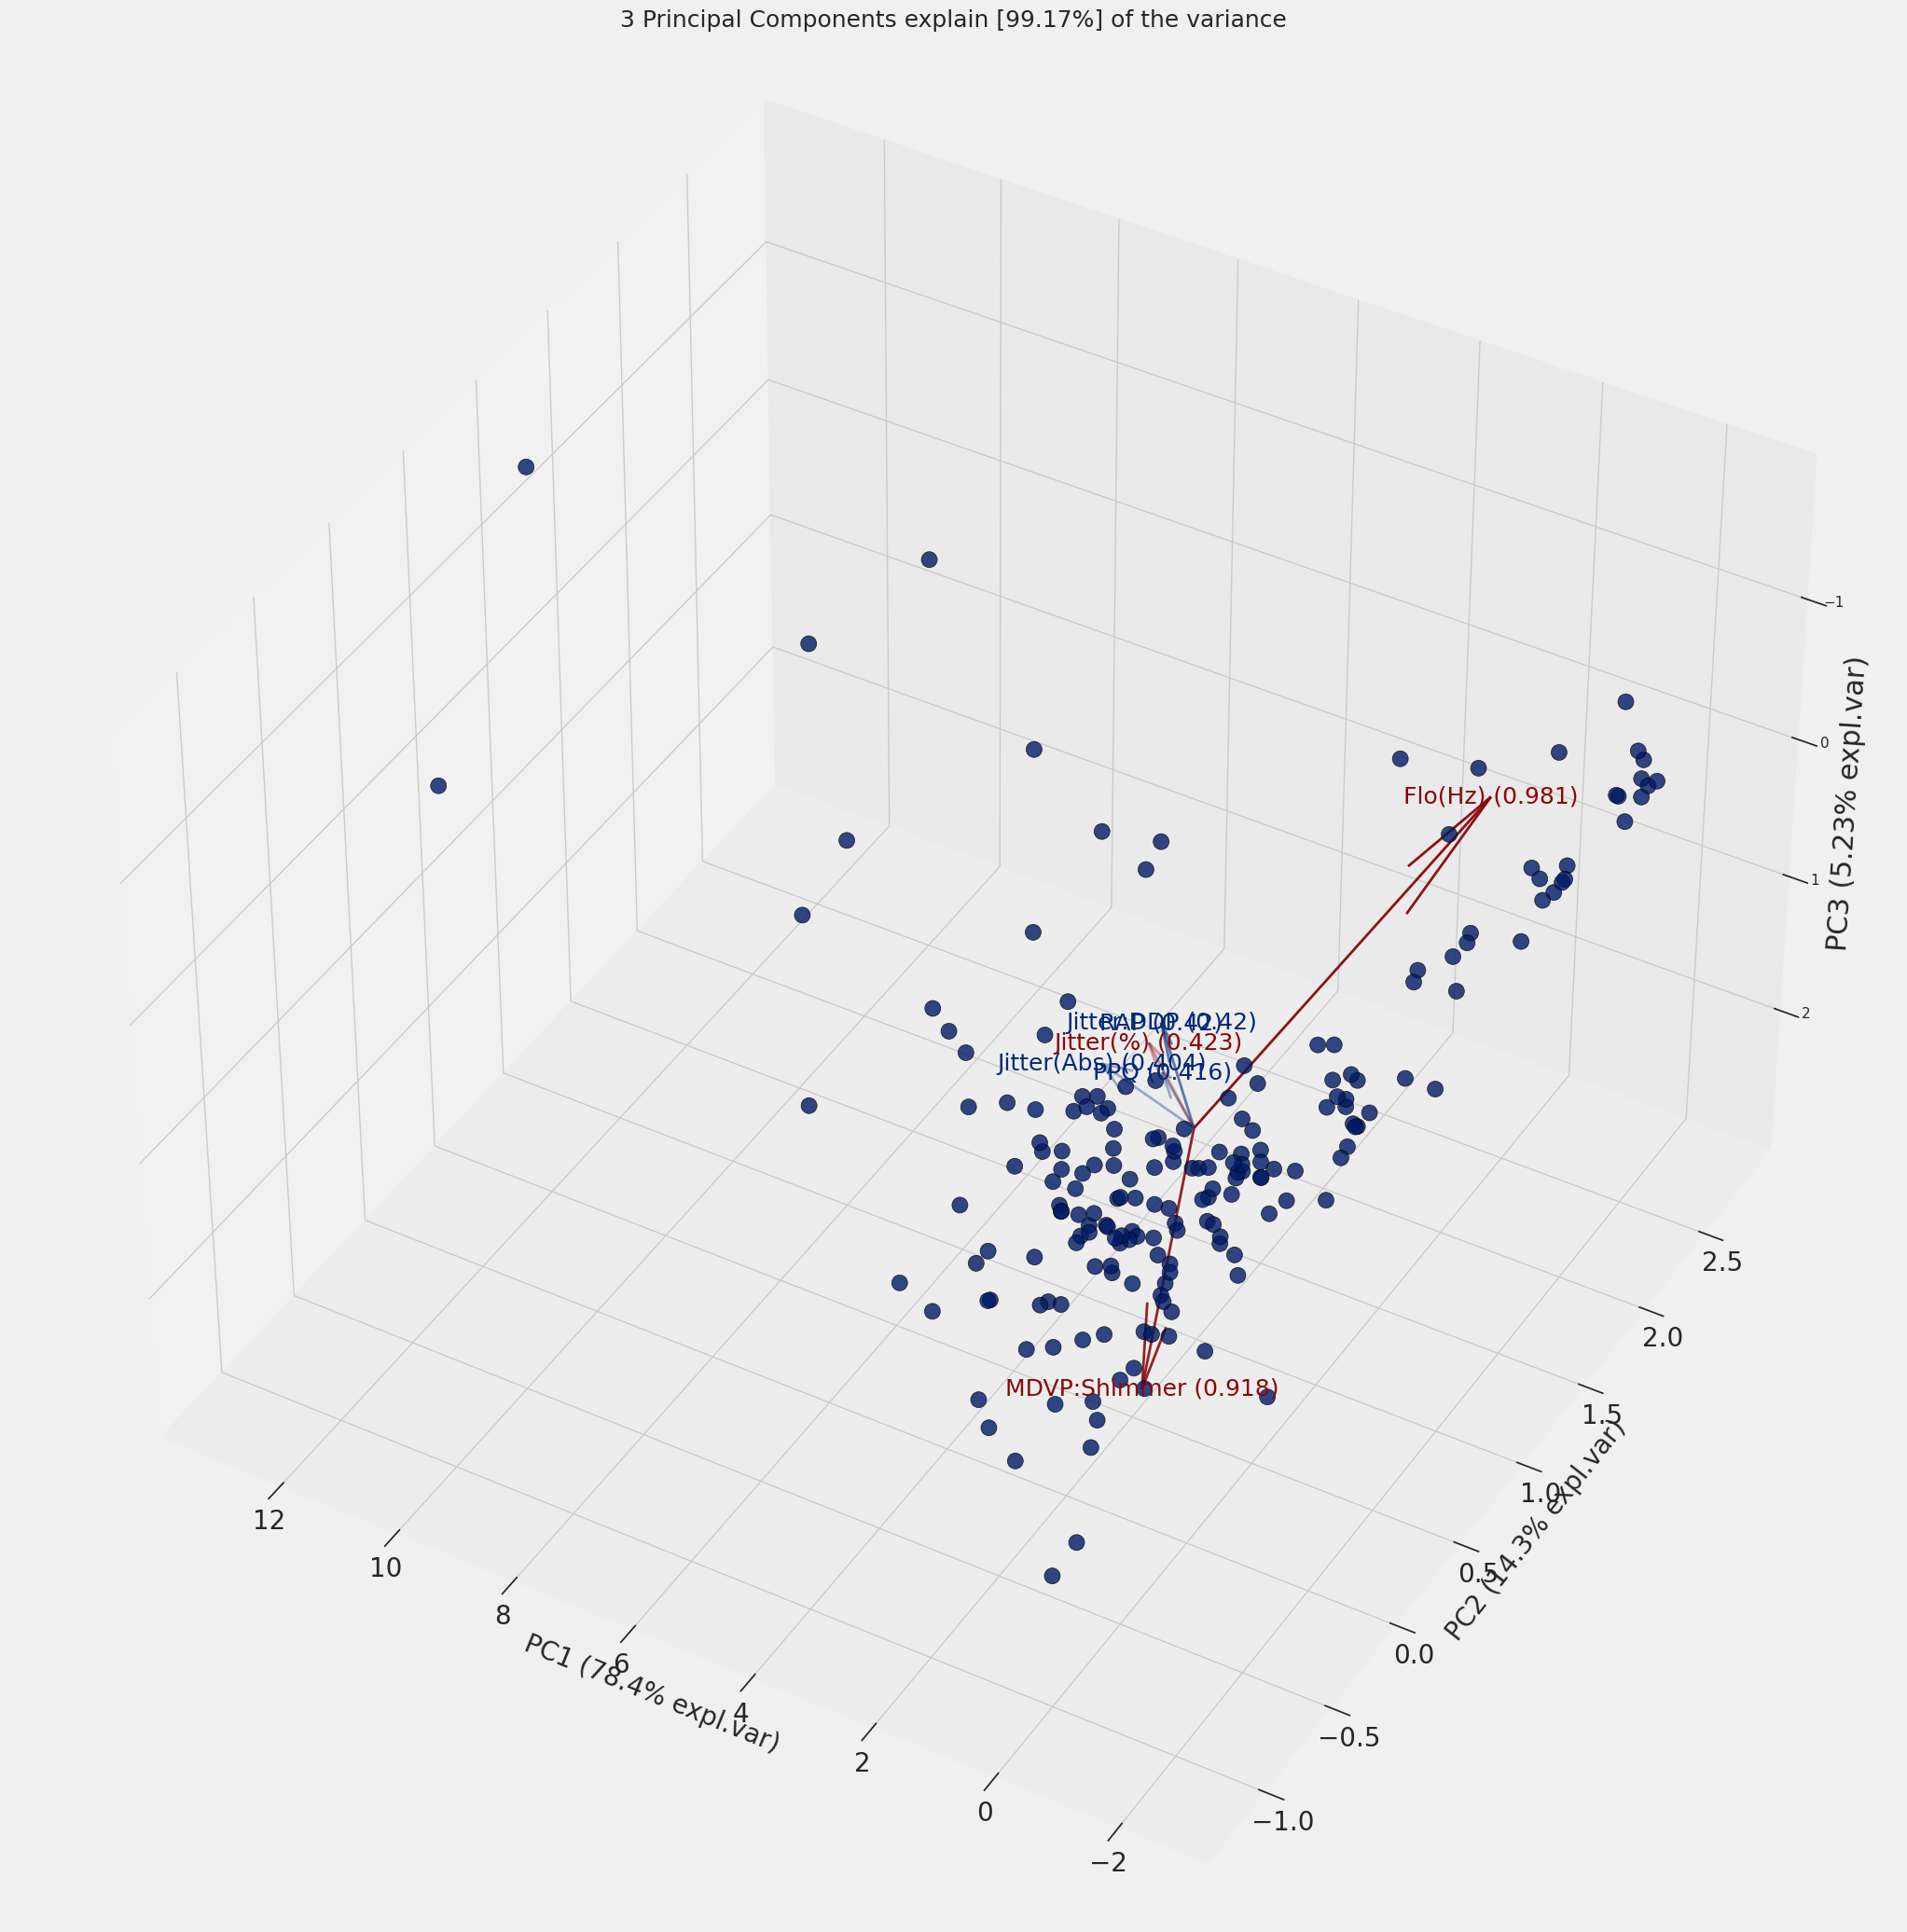

In [35]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [36]:
# #For Google Colab only
#   # Import the PyCaret Colab module
#   from pycaret.utils import enable_colab

#   # Enable PyCaret for Colab
#   enable_colab()

In order to demonstrate the predict_model() function on unseen data, a sample of 19 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 19 records were not available at the time when the machine learning experiment was performed.

In [37]:
data = df.sample(frac=0.9, random_state=90)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (176, 8)
Unseen Data For Predictions: (19, 8)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [38]:
from pycaret.classification import *
clf = setup(data=data, target='status', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.


* **Original Data** : Displays the original shape of the dataset. In this experiment (176, 8) means 176 samples and 8 features including the status column.


* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set.

* **Transformed Test Set** : Displays the shape of the transformed test set. There are 53 samples in test set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing All Models**

In [39]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [40]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this project, we will work with the first three best-performing models as our candidate models before PCA according to the above table.
* Extra Trees Classifier ('et')
* CatBoost Classifier ('catboost')
* Random Forest Classifier ('rf')


**Create Extra Trees Classifier**

In [41]:
et = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
#trained model object is stored in the variable 'et'.
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation.
The pre-defined values do not work for all models necessarily and sometimes they need to be changed depending on the model. For each classifier, 4 different search spaces including ”scikit-learn”, ”scikit-
optimize”, ”tune-sklearn”, and ”optuna” are applied and the
best among them is selected.
The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold.

**Tune Extra Trees Model**

In [43]:
tuned_et = tune_model(et, search_library='tune-sklearn', search_algorithm = 'hyperopt')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

2023-12-18 20:32:48,747	INFO worker.py:1673 -- Started a local Ray instance.
2023-12-18 20:32:50,478	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2023-12-18 20:32:50,485	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 1. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949
2023-12-18 20:32:54,286	WARNING tune.py:905 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, wrap `train_func` with `tune.with_resources(train_func, resources_per_trial={'gpu': 1})` which allows Tune to expose 1 GPU to each trial. For Ray Train Trainers, you can specify GPU resources through `ScalingConfig(use_gpu=True)`. You can also override `Trainable.default_resource_request` if using the Trainable API.


+-------------------------------------------------------------------+
| Configuration for experiment     _Trainable_2023-12-18_20-32-50   |
+-------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                  |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 10                               |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/_Trainable_2023-12-18_20-32-50
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_Trainable_2023-12-18_20-32-50`

Trial status: 1 PENDING
Current time: 2023-12-18 20:32:54. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/1 GPUs
+--------------------------------+
| Trial name            status   |
+--------------------------------+
| _Trainable_4175b122   PENDING  |
+--------------------------------+

Trial _Tr

**Create Catboost Model**

After tuning, model's accuracy improved from 85.38% to 86.09%

In [44]:
catboost = create_model('catboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Catboost Model**

In [45]:
tuned_catboost = tune_model(catboost, search_library='tune-sklearn', search_algorithm = 'hyperopt')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

2023-12-18 20:33:49,143	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 1. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949
2023-12-18 20:33:49,152	WARNING tune.py:905 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, wrap `train_func` with `tune.with_resources(train_func, resources_per_trial={'gpu': 1})` which allows Tune to expose 1 GPU to each trial. For Ray Train Trainers, you can specify GPU resources through `ScalingConfig(use_gpu=True)`. You can also override `Trainable.default_resource_request` if using the Trainable API.


+-------------------------------------------------------------------+
| Configuration for experiment     _Trainable_2023-12-18_20-33-49   |
+-------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                  |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 10                               |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/_Trainable_2023-12-18_20-33-49
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_Trainable_2023-12-18_20-33-49`

Trial status: 1 PENDING
Current time: 2023-12-18 20:33:49. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/1 GPUs
+--------------------------------+
| Trial name            status   |
+--------------------------------+
| _Trainable_9787c00c   PENDING  |
+--------------------------------+

Trial _Tr

After tuning, model's accuracy improved from 84.55% to 86.03%

In [46]:
#tuned model object is stored in the variable 'tuned_et'.
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='gini', max_depth=7,
                     max_features=0.8122025259408205, max_leaf_nodes=None,
                     max_samples=None,
                     min_impurity_decrease=0.0009067096979133129,
                     min_samples_leaf=2, min_samples_split=4,
                     min_weight_fraction_leaf=0.0, n_estimators=87, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Evaluate Extra Trees Model**

Update statmodels

In [47]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [48]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Evaluate Random Forest Model**

In [49]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Classifier Model**

In [50]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Classifier Model**

In [51]:
tuned_rf = tune_model(rf, search_library='optuna')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

After tuning, model's accuracy improved from 83.65% to 85.19%

**Evaluate RF Classifier Model**

In [52]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [53]:
# Tune hyperparameters with scikit-learn(default)
tuned_best_model = tune_model(best_model, search_library='tune-sklearn', search_algorithm = 'hyperopt')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

2023-12-18 20:36:37,314	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 1. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949
2023-12-18 20:36:37,324	WARNING tune.py:905 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, wrap `train_func` with `tune.with_resources(train_func, resources_per_trial={'gpu': 1})` which allows Tune to expose 1 GPU to each trial. For Ray Train Trainers, you can specify GPU resources through `ScalingConfig(use_gpu=True)`. You can also override `Trainable.default_resource_request` if using the Trainable API.


+-------------------------------------------------------------------+
| Configuration for experiment     _Trainable_2023-12-18_20-36-37   |
+-------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                  |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 10                               |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/_Trainable_2023-12-18_20-36-37
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_Trainable_2023-12-18_20-36-37`

Trial status: 1 PENDING
Current time: 2023-12-18 20:36:37. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/1 GPUs
+--------------------------------+
| Trial name            status   |
+--------------------------------+
| _Trainable_94c3f8c9   PENDING  |
+--------------------------------+

Trial _Tr

In [54]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='gini', max_depth=7,
                     max_features=0.8122025259408205, max_leaf_nodes=None,
                     max_samples=None,
                     min_impurity_decrease=0.0009067096979133129,
                     min_samples_leaf=2, min_samples_split=4,
                     min_weight_fraction_leaf=0.0, n_estimators=87, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [55]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [56]:
clf_pca = setup(data=data, target='status', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [57]:
best_model_pca1, best_model_pca2, best_model_pca3 = compare_models(n_select=3)

Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [58]:
best_model_pca1

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Tune the Best Model1**

In [59]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca1 = tune_model(best_model_pca1, search_library='scikit-optimize')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [60]:
tuned_best_model_pca1

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=8,
                     max_features=0.8184759790641322, max_leaf_nodes=None,
                     max_samples=None,
                     min_impurity_decrease=4.6625451152734227e-07,
                     min_samples_leaf=1, min_samples_split=6,
                     min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Evaluate the Best Model1**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [61]:
evaluate_model(tuned_best_model_pca1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Tune the Best Model2**

In [62]:
tuned_best_model_pca2 = tune_model(best_model_pca2, search_library='scikit-optimize')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


**Evaluate Best Model2**

In [63]:
evaluate_model(tuned_best_model_pca2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Tune the Best Model3**

In [64]:
tuned_best_model_pca3 = tune_model(best_model_pca3, search_library='tune-sklearn', search_algorithm = 'hyperopt')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

2023-12-18 20:39:01,680	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 1. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949
2023-12-18 20:39:01,687	WARNING tune.py:905 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, wrap `train_func` with `tune.with_resources(train_func, resources_per_trial={'gpu': 1})` which allows Tune to expose 1 GPU to each trial. For Ray Train Trainers, you can specify GPU resources through `ScalingConfig(use_gpu=True)`. You can also override `Trainable.default_resource_request` if using the Trainable API.


+-------------------------------------------------------------------+
| Configuration for experiment     _Trainable_2023-12-18_20-39-01   |
+-------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                  |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 10                               |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/_Trainable_2023-12-18_20-39-01
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_Trainable_2023-12-18_20-39-01`

Trial status: 1 PENDING
Current time: 2023-12-18 20:39:01. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/1 GPUs
+--------------------------------+
| Trial name            status   |
+--------------------------------+
| _Trainable_59958a3f   PENDING  |
+--------------------------------+

Trial _Tr

**Evaluate the Best Model3**

In [65]:
tuned_best_model_pca3

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=14, p=2,
                     weights='uniform')

In [66]:
evaluate_model(tuned_best_model_pca3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [67]:
!pip install shap

In [68]:
print("Numpy version: ", np.__version__)

Numpy version:  1.23.5


In [69]:
#!pip install numba

In [70]:
import shap

In [71]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
tuned_et_pca = tune_model(et_pca, search_library = 'scikit-optimize')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [73]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

In [ ]:
interpret_model(tuned_et_pca, plot='summary')


**Visualize a single prediction**

In [75]:
interpret_model(tuned_et_pca, plot='reason', observation=1)

**Visualize many predictions**

In [76]:
interpret_model(tuned_et_pca, plot='reason')